# Humen Heart Disease Detection

## Import the modules

In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [187]:
data = pd.read_csv('D:\My Laptop\Me\Programming\Machine Learning\Projects\Humen Heart Diseases Detection\Data\heart.csv')

In [188]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [190]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [191]:
data.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

C:\Users\HP\AppData\Local\Temp\ipykernel_13888\3672915099.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Female','Male'])


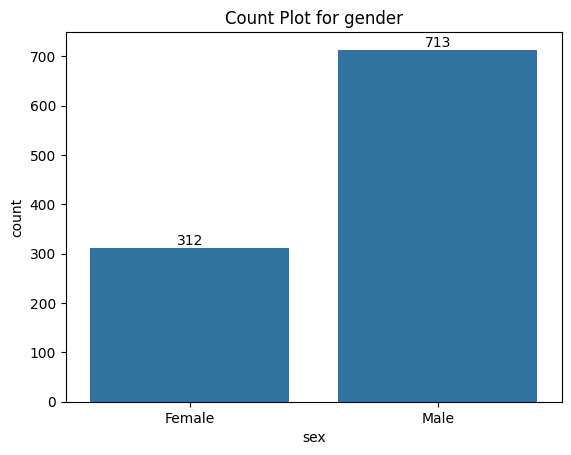

In [192]:
ax= sns.countplot(data=data,x='sex')
for label in ax.containers:
    ax.bar_label(label)
ax.set_xticklabels(['Female','Male'])
plt.title('Count Plot for gender')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_13888\1895439601.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Yes','No'])


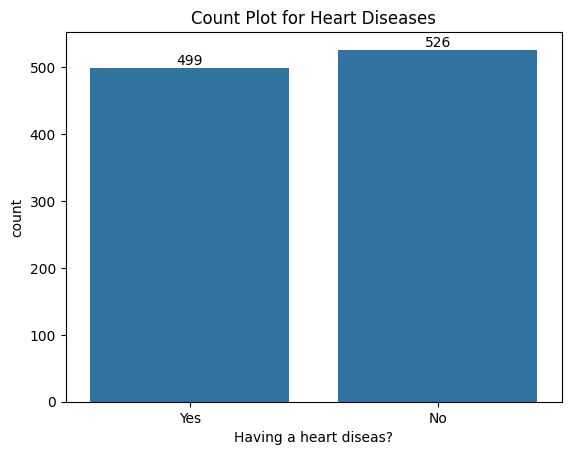

In [193]:
ax= sns.countplot(data=data,x= 'target')
plt.title('Count Plot for Heart Diseases')
for label in ax.containers :
    ax.bar_label(label)

ax.set_xticklabels(['Yes','No'])
ax.set_xlabel('Having a heart diseas?')
plt.show()

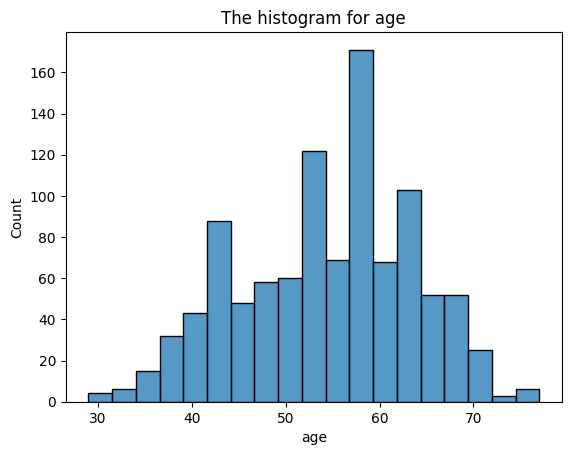

In [194]:
sns.histplot(data=data['age'])
plt.title('The histogram for age')
plt.show()

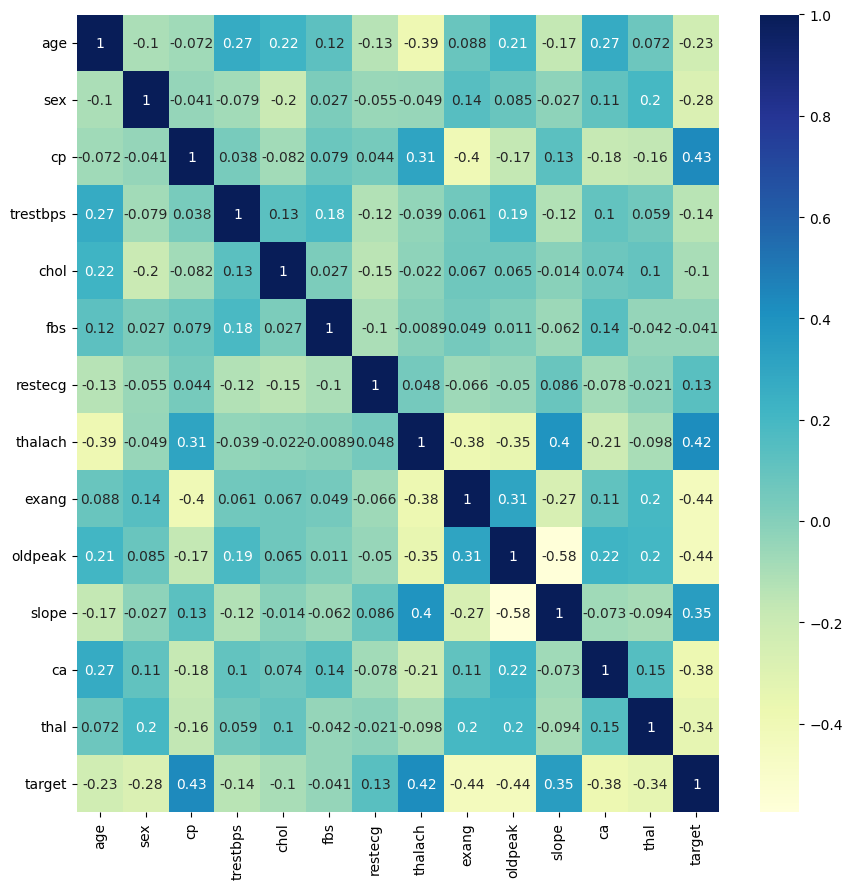

In [195]:
plt.figure(figsize=(9,9))
sns.heatmap(data=data.corr(),annot=True,cmap="YlGnBu")
plt.tight_layout()

In [196]:
data=data.drop('fbs',axis=1)

In [197]:
features = data.drop('target',axis=1)
target=data['target']

In [198]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train,y_test= train_test_split(features , target,test_size=0.2)

In [199]:
from sklearn.preprocessing import normalize

x_train_norm = normalize(x_train,norm='l2')
x_test_norm = normalize(x_test,norm='l2')

## Import the machine learning models

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.metrics import accuracy_score

## Create the models

#### 1- Logistics Regressiom

In [201]:
LR = LogisticRegression()

#### 2- Random Forest

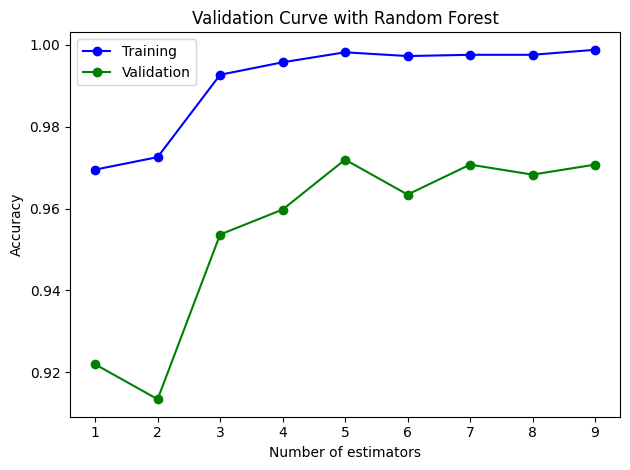

In [202]:
parameter_range=np.arange(1,10)
train_score,test_score = validation_curve(RandomForestClassifier(),x_train_norm,y_train,param_name='n_estimators',param_range=parameter_range,cv=5,scoring='accuracy')

mean_train_score = np.mean(train_score,axis=1)
mean_test_score = np.mean(test_score,axis=1)

plt.plot(parameter_range,mean_train_score,label='Training',color='b',marker='o')
plt.plot(parameter_range,mean_test_score,label='Validation',color='g',marker='o')

plt.title('Validation Curve with Random Forest')
plt.xlabel('Number of estimators')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

##### That's mean that the best estimator is 9

In [203]:
RFC = RandomForestClassifier(n_estimators=9)

#### 3- xgboost

In [204]:
XGB = xgboost.XGBClassifier()

#### 4- K Neighbors

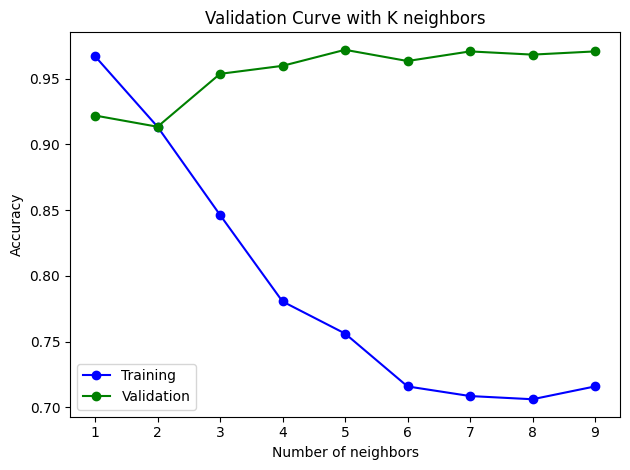

In [205]:
train_score , test_score = validation_curve(KNeighborsClassifier(),x_train_norm,y_train,param_name='n_neighbors',param_range=parameter_range,cv=5,scoring='accuracy')

mean_train_score= np.mean(train_score,axis=1)
mean_train_score = np.mean(test_score,axis=1)

plt.plot(parameter_range,mean_train_score,label="Training",color='b',marker='o')
plt.plot(parameter_range,mean_test_score,label='Validation',color='g',marker='o')

plt.title('Validation Curve with K neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

#### Thats mean that the best n_neighbors is 2

In [206]:
KNN = KNeighborsClassifier(n_neighbors=2)

#### 5- Support Vector Machine

In [207]:
SVM= SVC(kernel='sigmoid')

In [208]:
models= {'Logistic Regression':LR,'Random Forest':RFC,'XGBoost':XGB,'K neighbors':KNN,'Support Vector Machine':SVM}
accuracyDict = {}
for modelName,model in models.items():
    model.fit(x_train_norm,y_train)
    y_train_pred = model.predict(x_train_norm)
    y_test_pred = model.predict(x_test_norm)
    train_score = accuracy_score(y_train_pred,y_train)
    test_score = accuracy_score(y_test_pred,y_test)
    accuracyDict[modelName] = [train_score*100,test_score*100]

AccuracyDF = pd.DataFrame(accuracyDict)
AccuracyDF.index=['Train','Test']
    

In [209]:
AccuracyDF

,Logistic Regression,Random Forest,XGBoost,K neighbors,Support Vector Machine
Train,69.756098,99.878049,100.0,99.268293,64.146341
Test,70.243902,99.024390,100.0,94.146341,65.853659


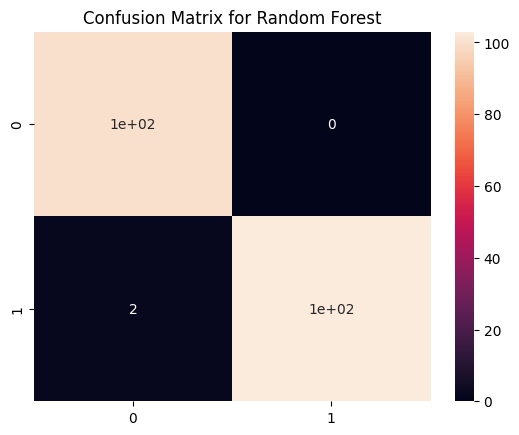

In [210]:
from sklearn.metrics import confusion_matrix
xgb = models['Random Forest']
y_xgb = xgb.predict(x_test_norm)
cm = confusion_matrix(y_test,y_xgb)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for Random Forest')
plt.show()

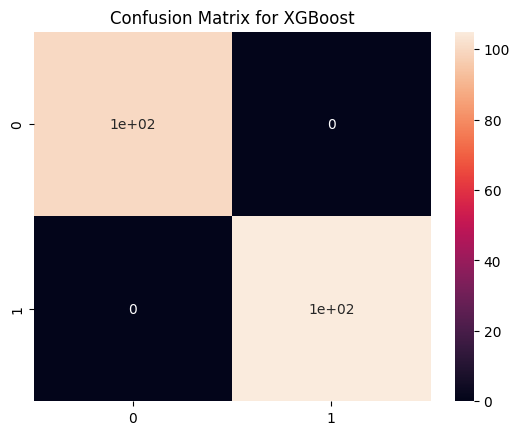

In [211]:
from sklearn.metrics import confusion_matrix
xgb = models['XGBoost']
y_xgb = xgb.predict(x_test_norm)
cm = confusion_matrix(y_test,y_xgb)
sns.heatmap(cm,annot=True)
plt.title('Confusion Matrix for XGBoost')
plt.show()

#### That's Mean the best algorithms is XGBoost

In [213]:
from joblib import dump

dump(xgb,'XGB.pkl')

['XGB.pkl']